In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("D:\omdena\water monitoring bhopal\data_concat_final.csv",parse_dates=True)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df['Year'] = pd.to_datetime(df['Date']).dt.strftime('%Y')
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%m')
df['Day'] = pd.to_datetime(df['Date']).dt.strftime('%d')
df=df.set_index("Date")
df

C:\Users\astha\AppData\Local\Temp\ipykernel_8640\2925474533.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')


,Dissolved Oxygen,Salinty,Temperature,Chlorophyll,Turbidity,pH,Suspended Matter,dom,Year,Month,Day
Date,,,,,,,,,,,
2018-12-18,-0.041608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,18
2018-12-23,-0.071488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,23
2018-12-28,-0.197621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,28
2019-02-01,-0.139806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,02,01
2019-07-01,-0.082936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,07,01
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.402251,2018,12,27
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462673,2018,12,27
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.442804,2018,12,28


In [5]:
df.columns

Index(['Dissolved Oxygen', 'Salinty', 'Temperature', 'Chlorophyll',
       'Turbidity', 'pH', 'Suspended Matter', 'dom', 'Year', 'Month', 'Day'],
      dtype='object')

In [12]:
df1=df.filter(['Suspended Matter', 'dom', 'Temperature','Chlorophyll', 'Turbidity', 'Salinty', 'Dissolved Oxygen', 'pH'])

In [13]:
df1.describe()

,Suspended Matter,dom,Temperature,Chlorophyll,Turbidity,Salinty,Dissolved Oxygen,pH
count,1502.000000,1561.000000,230.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.555410,0.508403,21.998327,0.168257,-0.127542,0.079325,-0.171642,7.556143
std,0.046108,0.077660,24.914802,0.160879,0.116942,0.057328,0.162613,0.294179
min,0.425470,0.335510,-123.148520,0.016643,-0.702875,-0.059387,-0.889768,6.661257
25%,0.520800,0.448248,21.746651,0.072429,-0.165194,0.033387,-0.210491,7.346453
50%,0.557862,0.502377,27.428802,0.110977,-0.109167,0.079674,-0.114248,7.578280
75%,0.588201,0.573641,33.255050,0.207239,-0.047502,0.111538,-0.073730,7.705395
max,0.701516,1.262487,42.034548,0.876998,-0.006209,0.247774,-0.017108,8.300851


In [14]:
nan_count = df1.isna().sum()
print(nan_count)

Suspended Matter    3604
dom                 3545
Temperature         4876
Chlorophyll         4940
Turbidity           4940
Salinty             4940
Dissolved Oxygen    4940
pH                  4940
dtype: int64


<AxesSubplot: xlabel='Date'>

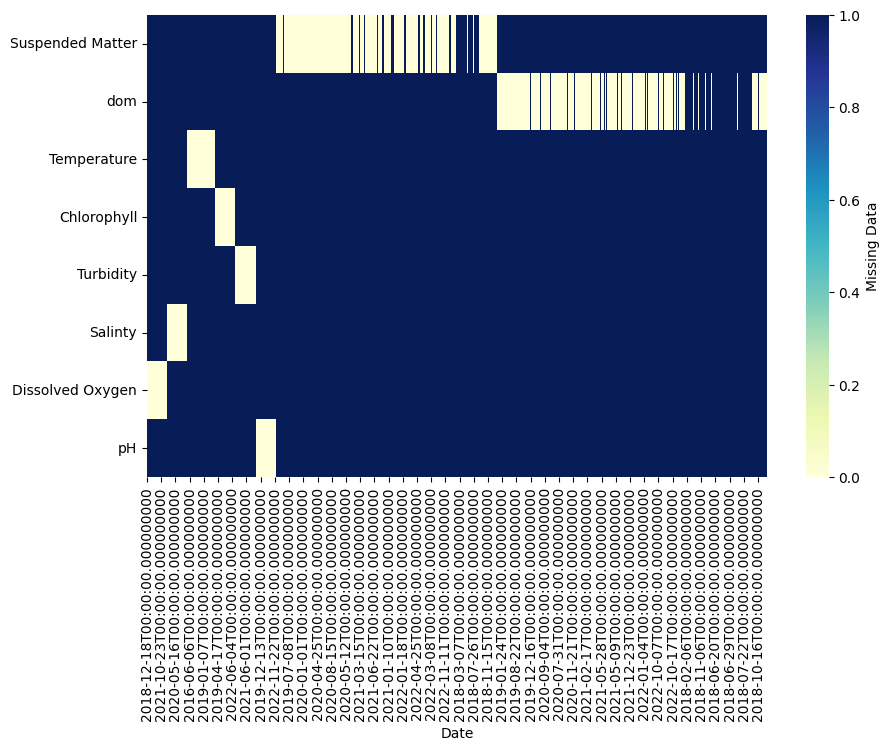

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

# **Analysis of Data**

## Histplots with zone divisions.

### Suspended Matter

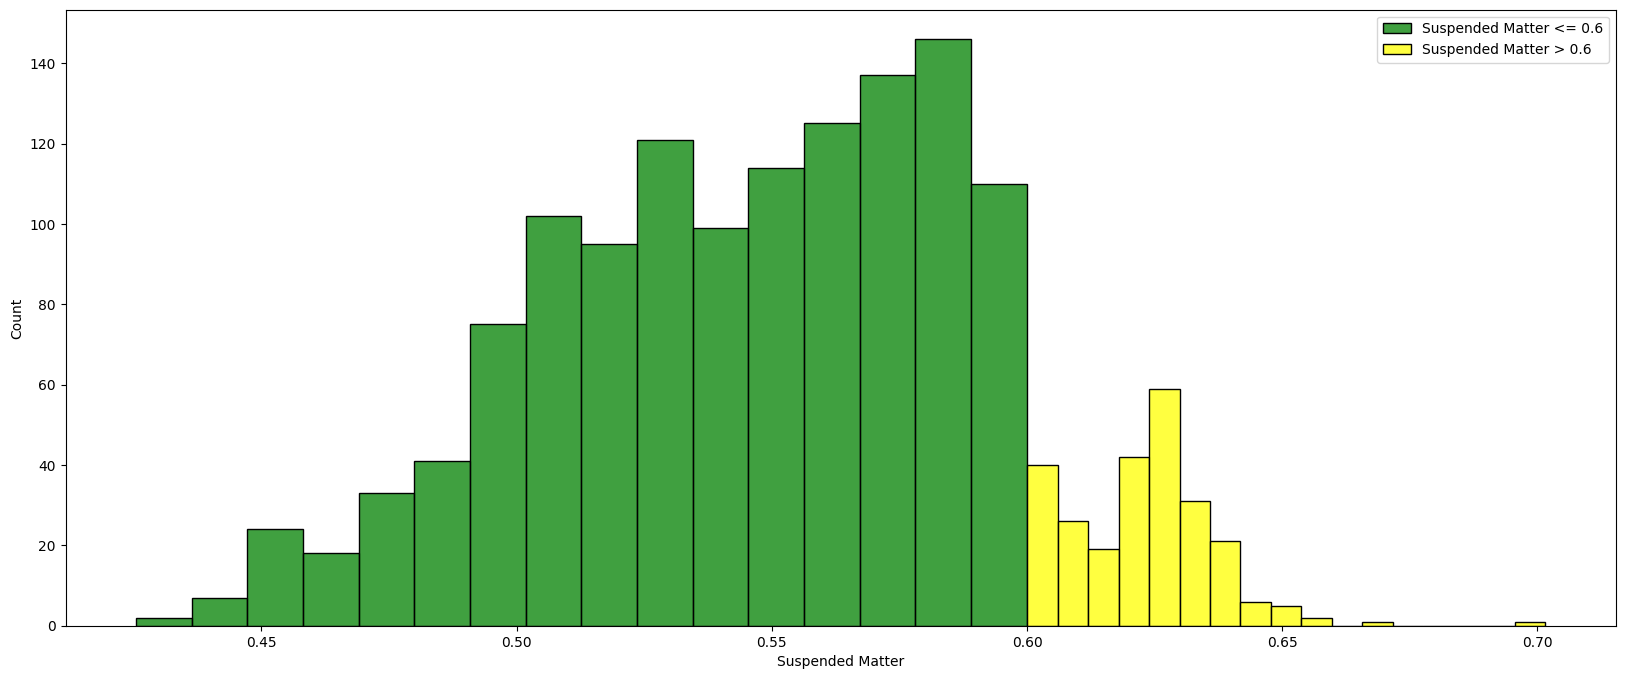

In [16]:
limit = 0.600
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Suspended Matter', data=df1[df1['Suspended Matter'] <= limit], color='green', label=f'Suspended Matter <= {limit}')
sns.histplot(x='Suspended Matter', data=df1[df1['Suspended Matter'] > limit], color='yellow', label=f'Suspended Matter > {limit}', ax=ax)
ax.set_xlabel('Suspended Matter')
ax.set_ylabel('Count')
ax.legend()
plt.show()

> **70%** of the values of **Suspended Matter** lie in **good zone** & rest **30%** of them **need treatment**.

### Dissolved Organic Matter

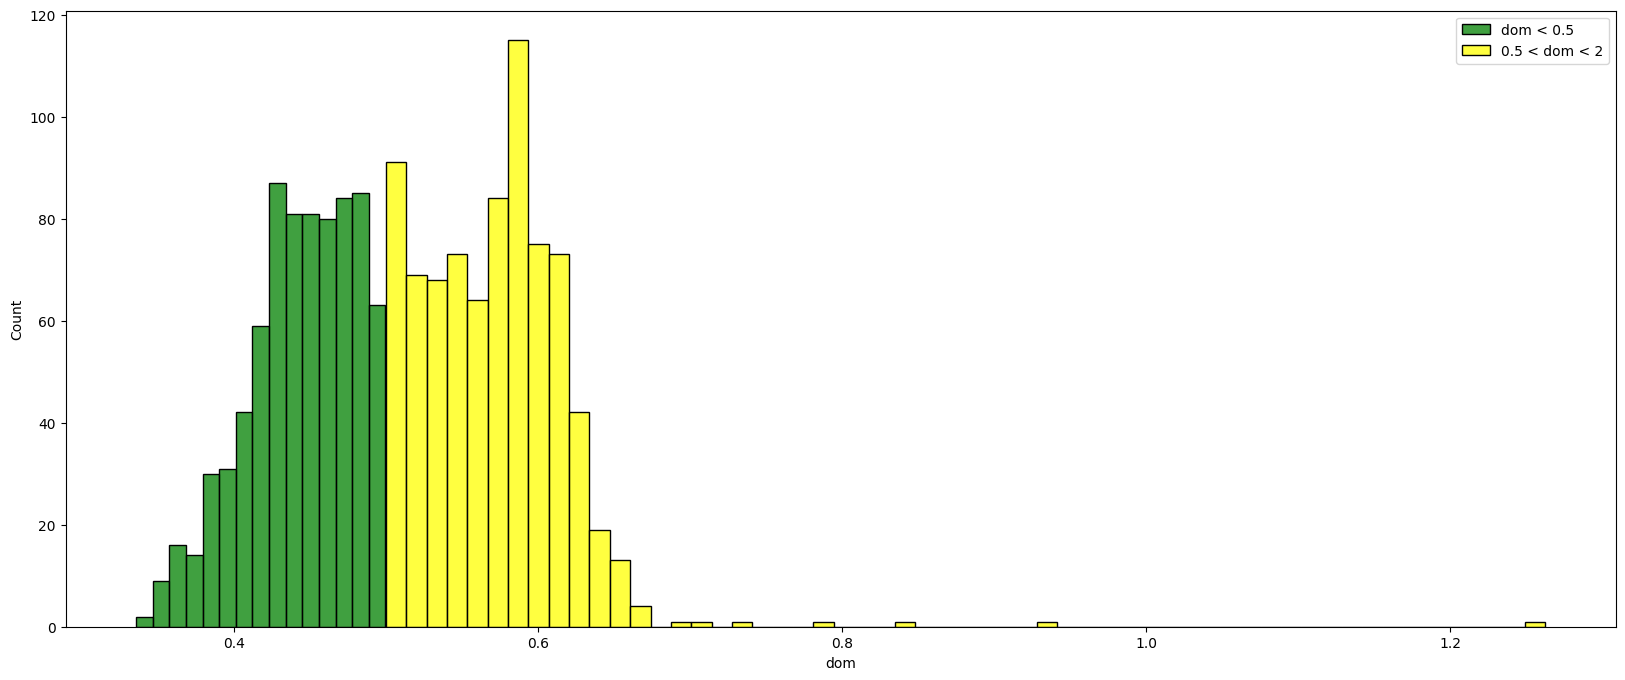

In [19]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='dom', data=df[(df['dom'] <0.5 )], color='green', label='dom < 0.5')
sns.histplot(x='dom', data=df[(df['dom'] >= 0.5) & (df['dom'] <=2)], color='yellow', label='0.5 < dom < 2')
sns.histplot(x='dom', data=df[(df['dom'] > 2 )], color='red', label='dom >= 2')
ax.set_xlabel('dom')
ax.set_ylabel('Count')
ax.legend()
plt.show()

> **More than half** of the **Dissolved Organic Matter** is in the **Need treatment zone**. **Rest** is in **Good zone**

### Temperature

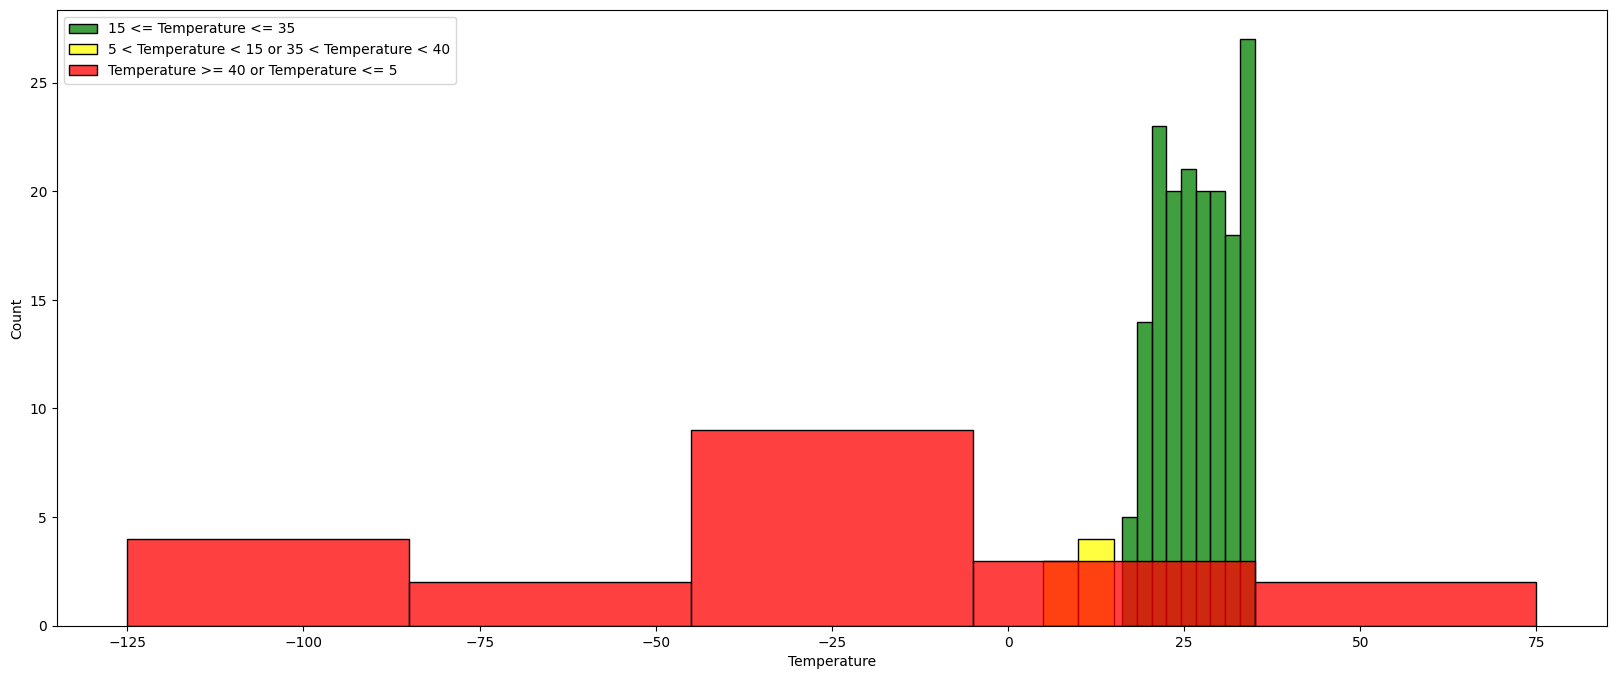

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Temperature', data=df[(df['Temperature'] <= 35) & (df['Temperature'] >= 15)], color='green', label='15 <= Temperature <= 35')
sns.histplot(x='Temperature', data=df[((df['Temperature'] > 35) & (df['Temperature'] < 40)) | ((df['Temperature'] < 15)&(df['Temperature'] > 5))], color='yellow', label='5 < Temperature < 15 or 35 < Temperature < 40', bins = np.arange(5, 40, 5))
sns.histplot(x='Temperature', data=df[(df['Temperature'] >= 40) | (df['Temperature'] <= 5)], color='red', label='Temperature >= 40 or Temperature <= 5', bins = np.arange(-125, 100, 40))
ax.set_xlabel('Temperature')
ax.set_ylabel('Count')
ax.legend()
plt.show()


> **Tempratures <=0 and >=40 are outliers** & in the **bad zone**.

### Chlorophyll

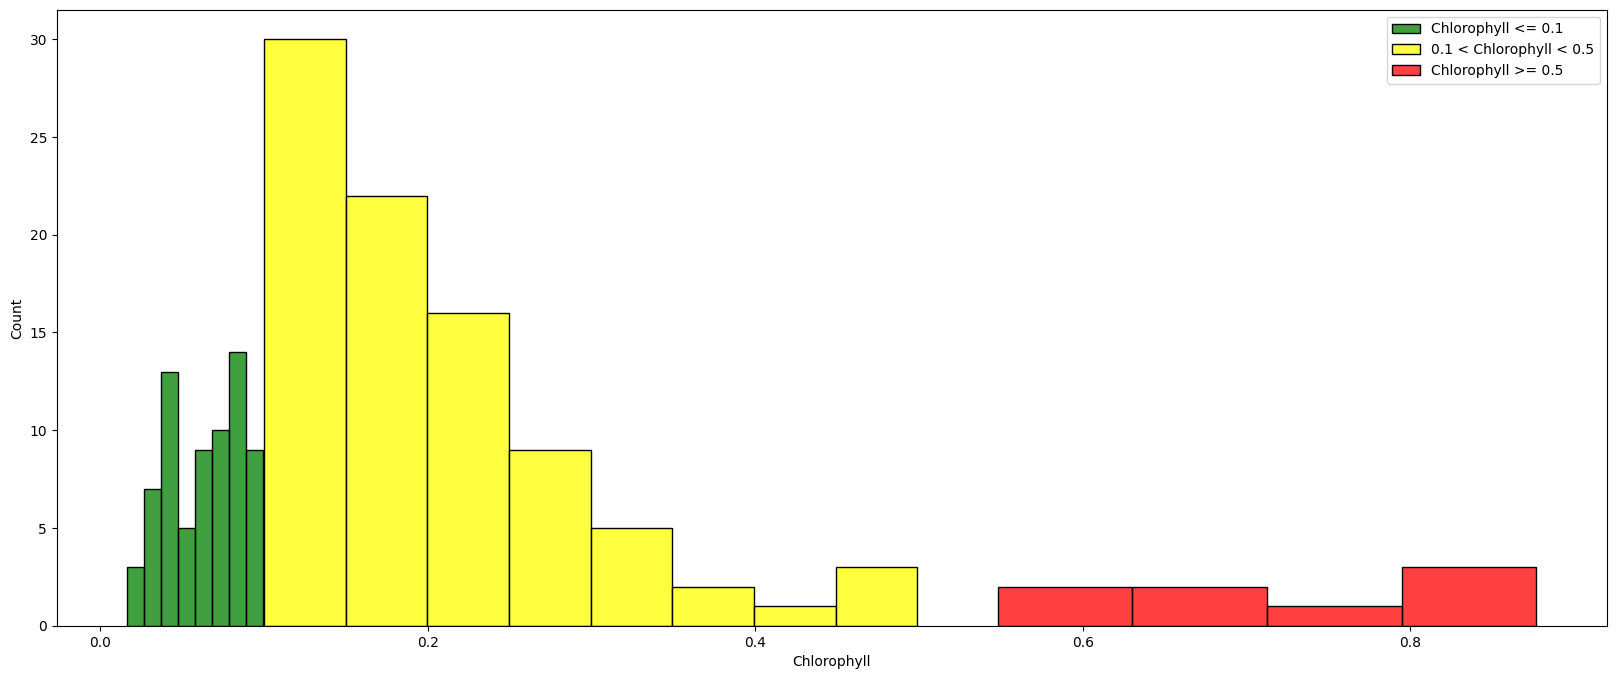

In [21]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] <= 0.1) & (df['Chlorophyll'] >= -0.1)], color='green', label='Chlorophyll <= 0.1')
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] > 0.1) & (df['Chlorophyll'] < 0.5)], color='yellow', label='0.1 < Chlorophyll < 0.5')
sns.histplot(x='Chlorophyll', data=df[(df['Chlorophyll'] >= 0.5)], color='red', label='Chlorophyll >= 0.5')
ax.set_xlabel('Chlorophyll')
ax.set_ylabel('Count')
ax.legend()
plt.show()

> 1. About **70%** of the **Chlorophyll** lies in the **Need treatment zone**.
>2. About **10%** of **Chlorophyll** lies in **Good zone**
> 2. The rest **20%** is in **Poor zone**.

### Turbidity

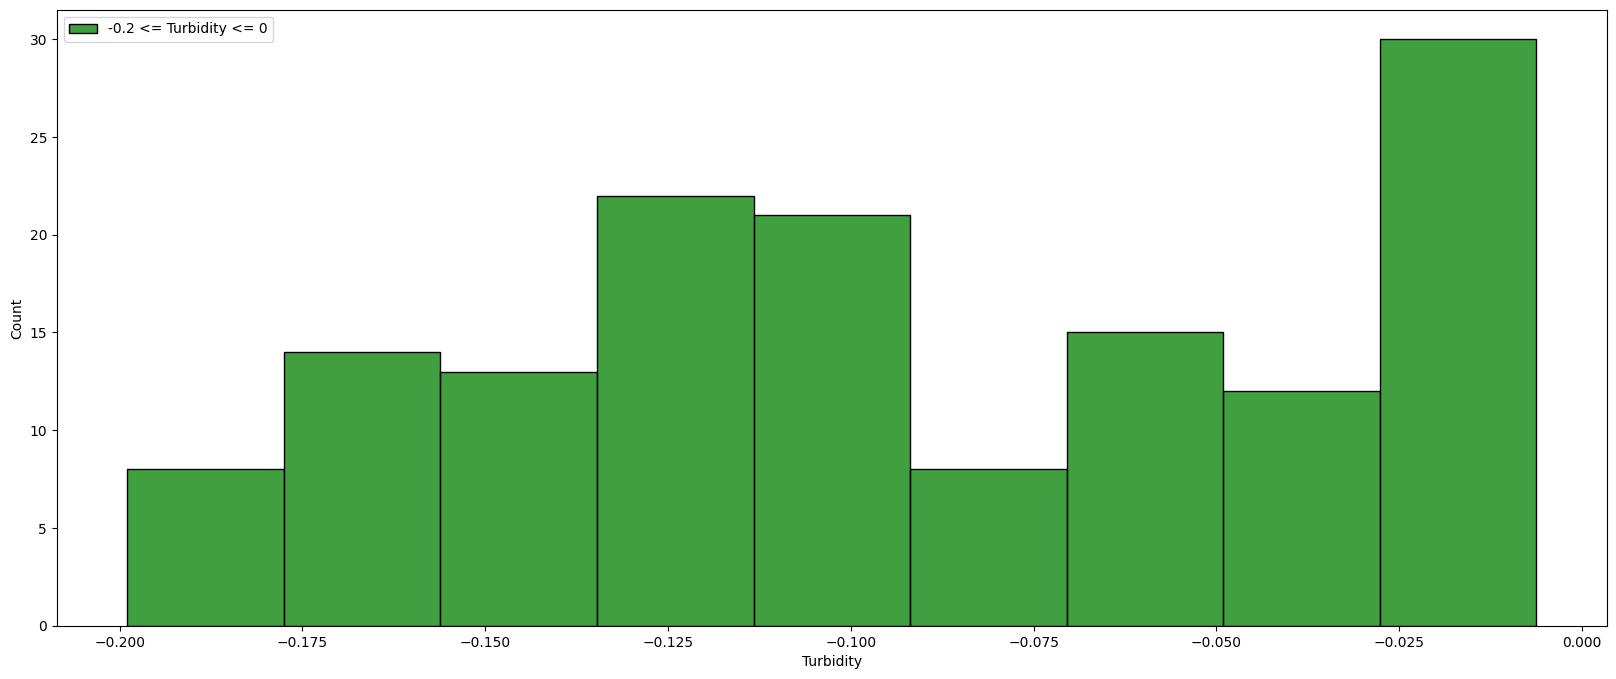

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Turbidity', data=df[(df['Turbidity'] <= 0) & (df['Turbidity'] >= -0.2)], color='green', label='-0.2 <= Turbidity <= 0')
sns.histplot(x='Turbidity', data=df[(df['Turbidity'] > 0) & (df['Turbidity'] < 0.2)], color='yellow', label='0 < Turbidity < 0.2')
ax.set_xlabel('Turbidity')
ax.set_ylabel('Count')
ax.legend()
plt.show()

> **All** of the values of Turbidity lie in **good zone**

### Salinity

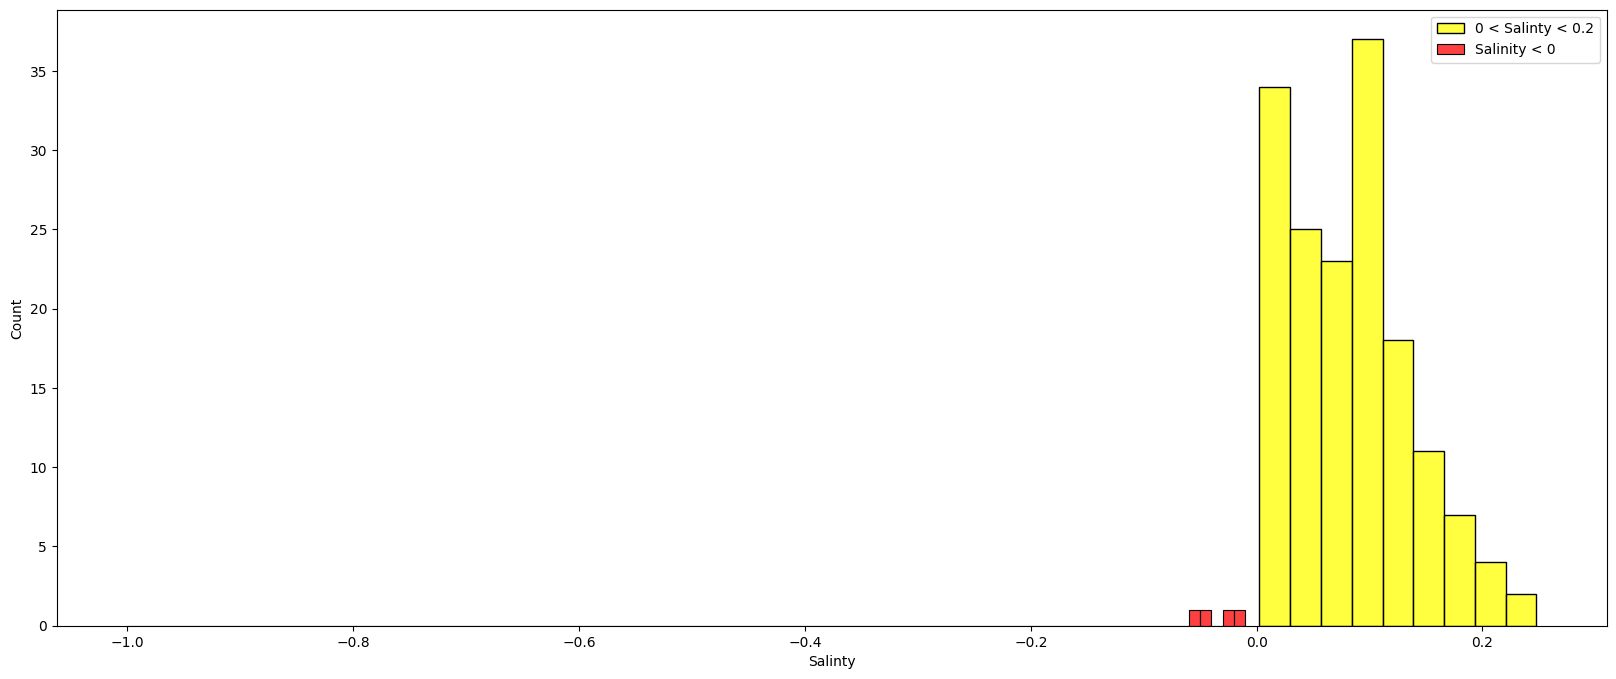

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Salinty', data=df[(df['Salinty'] >= 0) & (df['Salinty'] <=1)], color='yellow', label='0 < Salinty < 0.2')
sns.histplot(x='Salinty', data=df[(df['Salinty'] < 0)], color='red', label='Salinity < 0',bins=np.arange(-1, 0, 0.01))
ax.set_xlabel('Salinty')
ax.set_ylabel('Count')
ax.legend()
plt.show()

> 1. Almost **all** of the values of Salinity lie in **need treatment** zone.
> 2. The **single poor zone** point is an **outlier**.

### Dissolved Oxygen

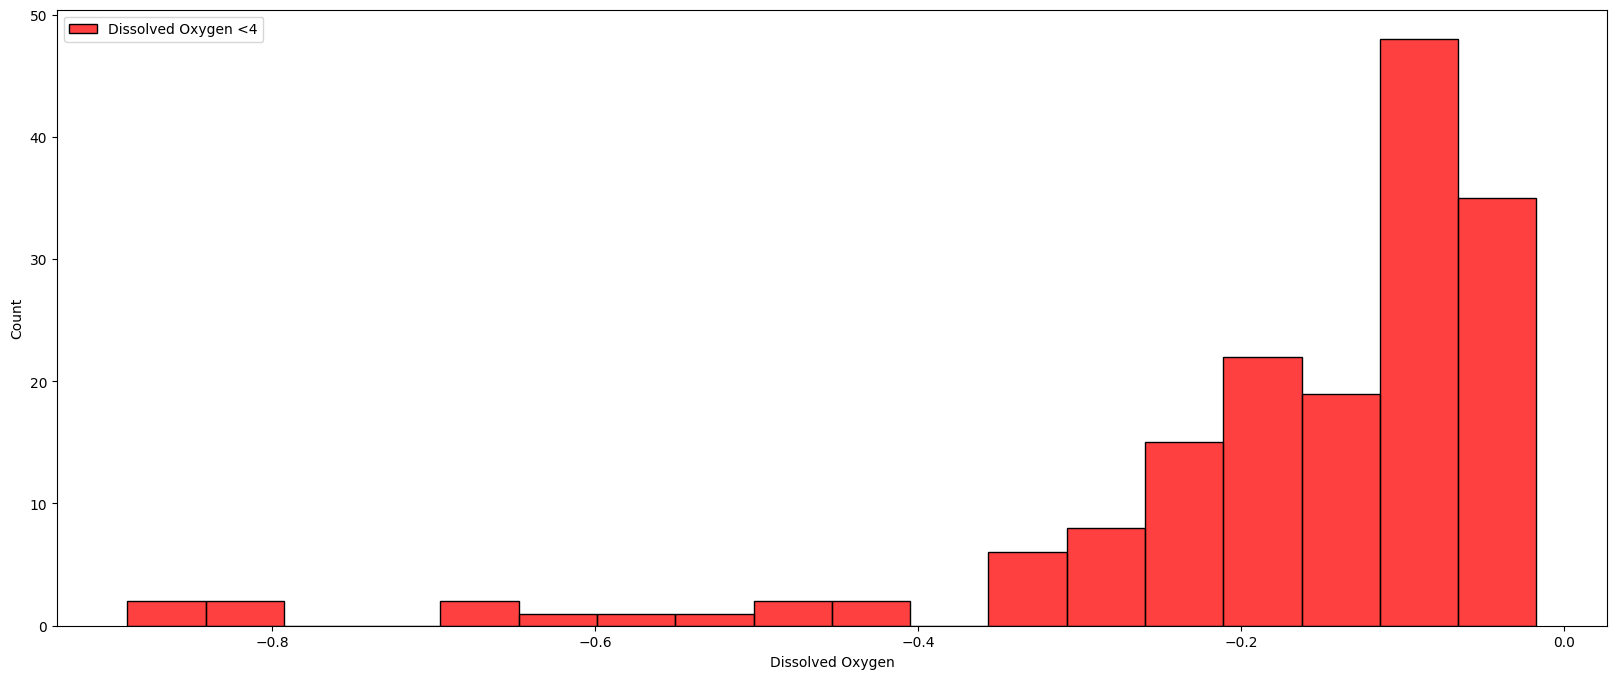

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] >6.5 )], color='green', label='Dissolved Oxygen >6.5')
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] >= 4) & (df['Dissolved Oxygen'] <=6.5)], color='yellow', label='4 < Dissolved Oxygen < 6.5')
sns.histplot(x='Dissolved Oxygen', data=df[(df['Dissolved Oxygen'] <4 )], color='red', label='Dissolved Oxygen <4')
ax.set_xlabel('Dissolved Oxygen')
ax.set_ylabel('Count')
ax.legend()
plt.show()


>  The points **below 0 are outliers**.

### pH

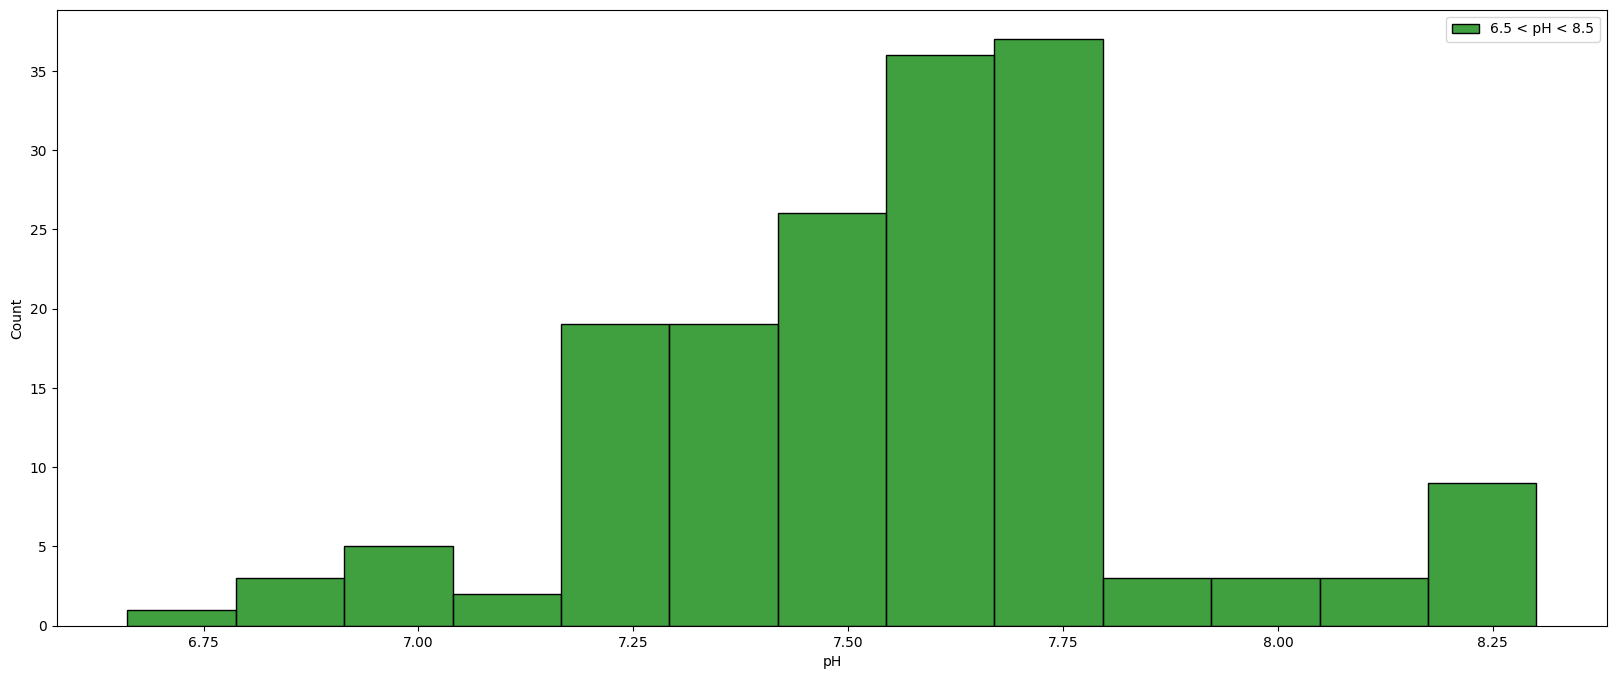

In [27]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='pH', data=df[(df['pH'] >= 6.5) & (df['pH'] <=8.5)], color='green', label='6.5 < pH < 8.5')
sns.histplot(x='pH', data=df[((df['pH'] > 4) & (df['pH'] < 6.5)) | ((df['pH'] < 11)&(df['pH'] > 8.5))], color='yellow', label='4 < pH < 6.5 or 8.5 < pH < 11')
sns.histplot(x='pH', data=df[((df['pH'] > 11) & (df['pH'] < 14)) | ((df['pH'] < 4)&(df['pH'] > 1))], color='red', label='11 < pH < 14 or 1 < pH < 4')
ax.set_xlabel('pH')
ax.set_ylabel('Count')
ax.legend()
plt.show()

> **100%** of the **pH** data is in the **good zone**.

### Conclusions

1. **Good zones parameters:**

  a. Suspended Matter

  b. Turbidity

  c. pH

  d. Dissolved Oxygen

  e. Temperature
2. **Needs treatment zones parameters:**

  a. Dissolved Organic Matter

  b. Chlorophyll

  c. Salinity
3. **Poor zones parameters:**

  a. Dissolved Oxygen

## Suspended Matter v/s Dissolved organic Matter 

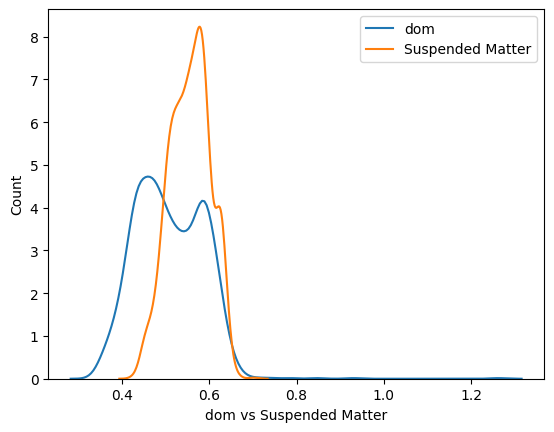

In [28]:
dom_data = df['dom']
sm_data = df['Suspended Matter']

sns.kdeplot(dom_data, label='dom')
sns.kdeplot(sm_data, label='Suspended Matter')
plt.legend(loc='upper right')
plt.xlabel('dom vs Suspended Matter')
plt.ylabel('Count')
plt.show("png")

## Dissolved Organic Matter v/s Dissolved Oxygen

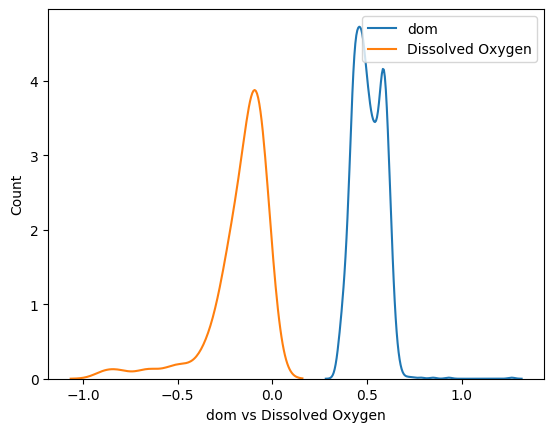

In [29]:
dom_data = df['dom']
do_data = df['Dissolved Oxygen']

sns.kdeplot(dom_data, label='dom')
sns.kdeplot(do_data, label='Dissolved Oxygen')
plt.legend(loc='upper right')
plt.xlabel('dom vs Dissolved Oxygen')
plt.ylabel('Count')
plt.show("png")

## Chlorophyll v/s pH

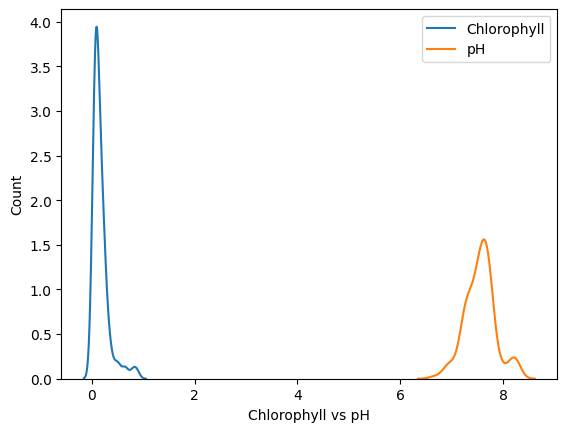

In [30]:
chl_data = df['Chlorophyll']
pH_data = df['pH']

sns.kdeplot(chl_data, label='Chlorophyll')
sns.kdeplot(pH_data, label='pH')
plt.legend(loc='upper right')
plt.xlabel('Chlorophyll vs pH')
plt.ylabel('Count')
plt.show("png")

## pH v/s Salinity

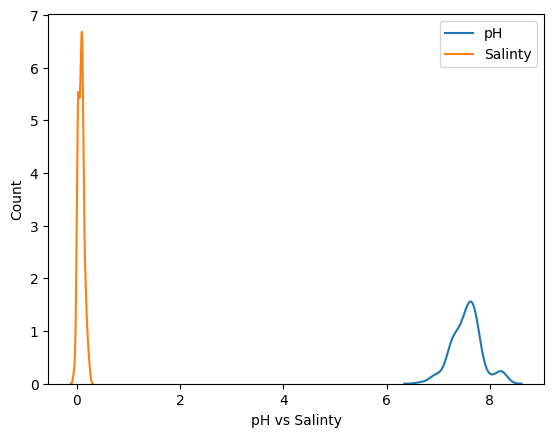

In [32]:
pH_data = df['pH']
sal_data = df['Salinty']

sns.kdeplot(pH_data, label='pH')
sns.kdeplot(sal_data, label='Salinty')
plt.legend(loc='upper right')
plt.xlabel('pH vs Salinty')
plt.ylabel('Count')
plt.show("png")

## Turbidity v/s Chlorophyll

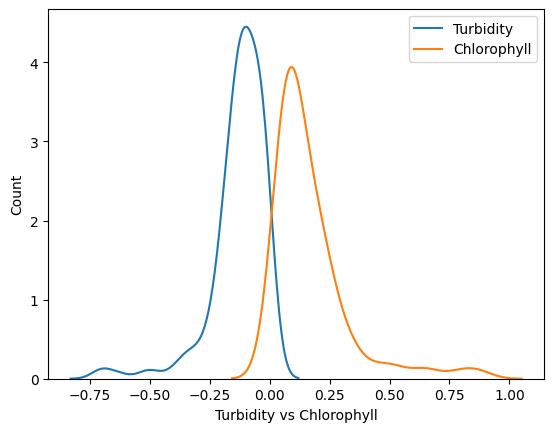

In [33]:
turb_data = df['Turbidity']
chl_data = df['Chlorophyll']

sns.kdeplot(turb_data, label='Turbidity')
sns.kdeplot(chl_data, label='Chlorophyll')
plt.legend(loc='upper right')
plt.xlabel('Turbidity vs Chlorophyll')
plt.ylabel('Count')
plt.show("png")

##Chlorophyll v/s Dissolved Oxygen

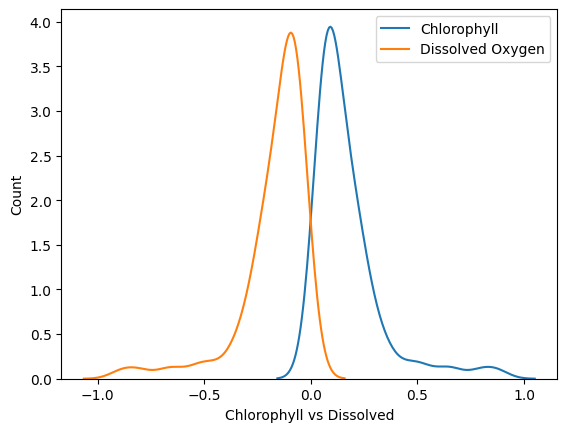

In [34]:
chl_data = df['Chlorophyll']
do_data = df['Dissolved Oxygen']

sns.kdeplot(chl_data, label='Chlorophyll')
sns.kdeplot(do_data, label='Dissolved Oxygen')
plt.legend(loc='upper right')
plt.xlabel('Chlorophyll vs Dissolved')
plt.ylabel('Count')
plt.show("png")

## Turbidity v/s Dissolved Oxygen

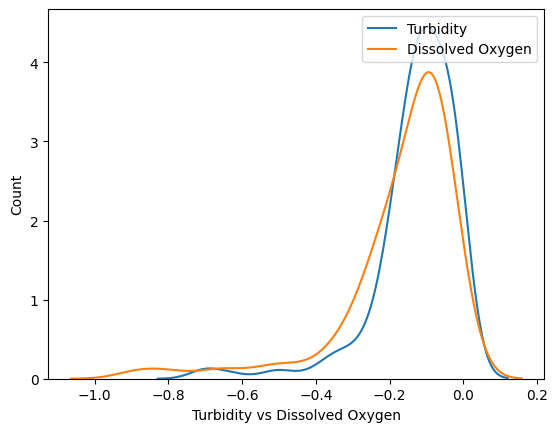

In [35]:
sns.kdeplot(turb_data, label='Turbidity')
sns.kdeplot(do_data, label='Dissolved Oxygen')
plt.legend(loc='upper right')
plt.xlabel('Turbidity vs Dissolved Oxygen')
plt.ylabel('Count')
plt.show("png")

# Monsoon Analysis

##Suspended Matter

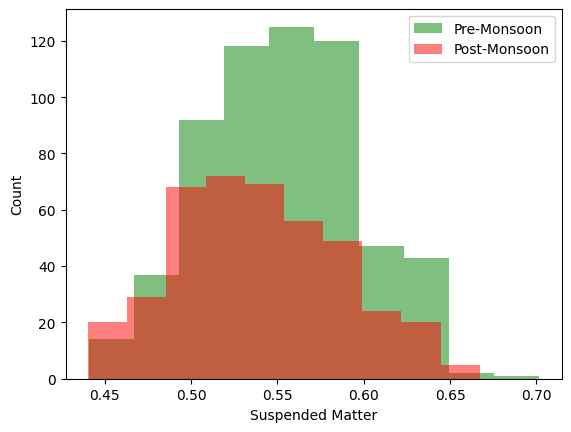

In [36]:
pre_monsoon_data = df[df['Month'].str.startswith(('01', '02', '03', '04', '05'))]
post_monsoon_data = df[df['Month'].str.startswith(('10', '11', '12'))]


plt.hist(pre_monsoon_data['Suspended Matter'], alpha=0.5, label='Pre-Monsoon', color='green')
plt.hist(post_monsoon_data['Suspended Matter'], alpha=0.5, label='Post-Monsoon', color='red')
plt.legend(loc='upper right')
plt.xlabel('Suspended Matter')
plt.ylabel('Count')
plt.show("png")

##Dissolved Organic Matter

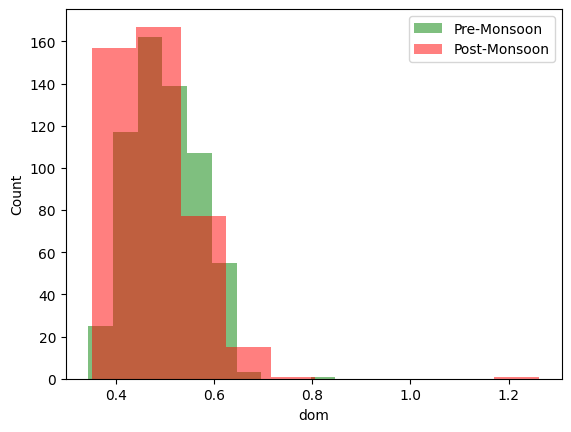

In [37]:
plt.hist(pre_monsoon_data['dom'], alpha=0.5, label='Pre-Monsoon', color='green')
plt.hist(post_monsoon_data['dom'], alpha=0.5, label='Post-Monsoon', color='red')
plt.legend(loc='upper right')
plt.xlabel('dom')
plt.ylabel('Count')
plt.show("png")

##Chlorophyll

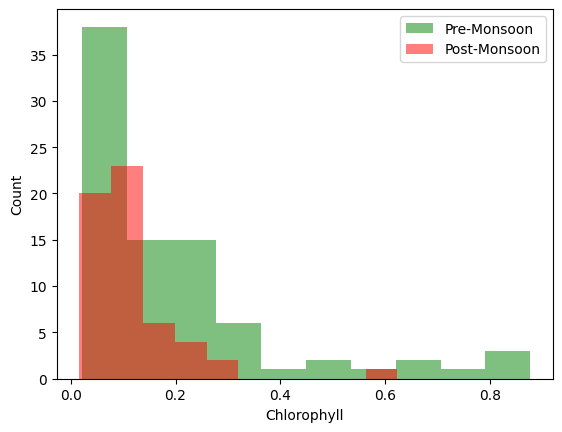

In [38]:
plt.hist(pre_monsoon_data['Chlorophyll'], alpha=0.5, label='Pre-Monsoon', color='green')
plt.hist(post_monsoon_data['Chlorophyll'], alpha=0.5, label='Post-Monsoon', color='red')
plt.legend(loc='upper right')
plt.xlabel('Chlorophyll')
plt.ylabel('Count')
plt.show("png")

##Turbidity

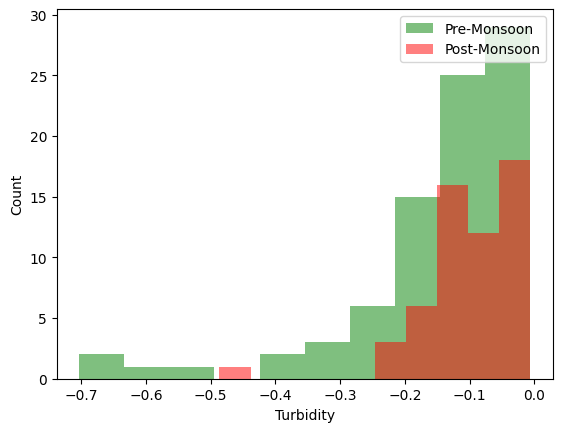

In [39]:
plt.hist(pre_monsoon_data['Turbidity'], alpha=0.5, label='Pre-Monsoon', color='green')
plt.hist(post_monsoon_data['Turbidity'], alpha=0.5, label='Post-Monsoon', color='red')
plt.legend(loc='upper right')
plt.xlabel('Turbidity')
plt.ylabel('Count')
plt.show("png")

##Salinity

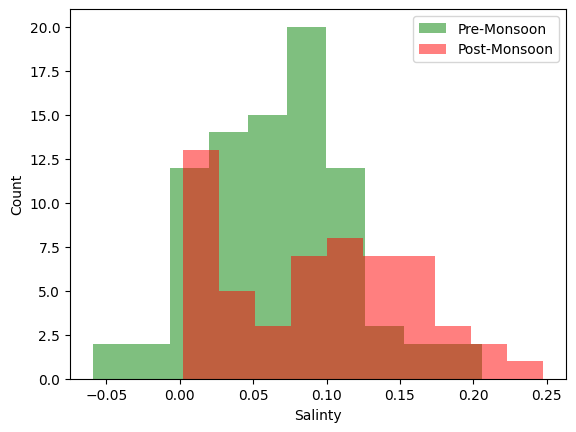

In [40]:
plt.hist(pre_monsoon_data['Salinty'], alpha=0.5, label='Pre-Monsoon', color='green')
plt.hist(post_monsoon_data['Salinty'], alpha=0.5, label='Post-Monsoon', color='red')
plt.legend(loc='upper right')
plt.xlabel('Salinty')
plt.ylabel('Count')
plt.show("png")

##Dissolved Oxygen

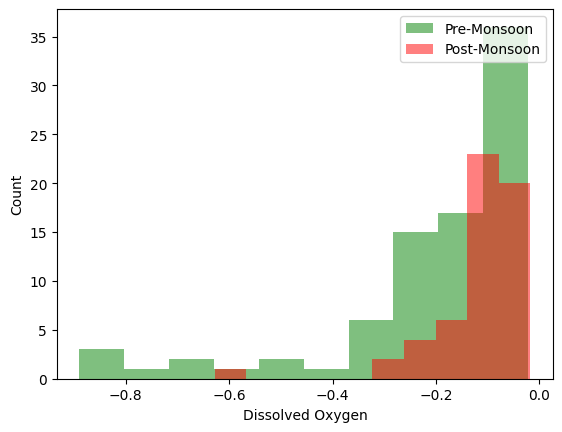

In [41]:
plt.hist(pre_monsoon_data['Dissolved Oxygen'], alpha=0.5, label='Pre-Monsoon', color='green')
plt.hist(post_monsoon_data['Dissolved Oxygen'], alpha=0.5, label='Post-Monsoon', color='red')
plt.legend(loc='upper right')
plt.xlabel('Dissolved Oxygen')
plt.ylabel('Count')
plt.show("png")

##pH

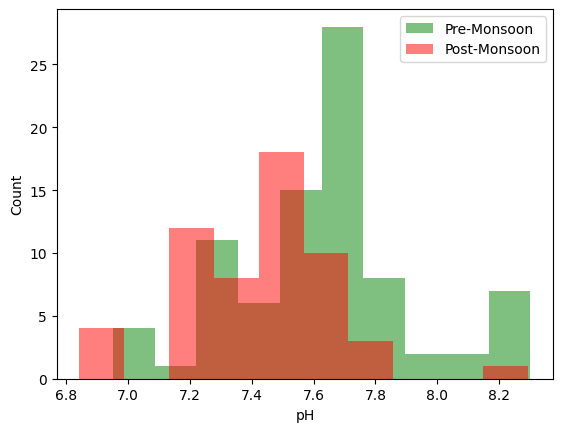

In [42]:
plt.hist(pre_monsoon_data['pH'], alpha=0.5, label='Pre-Monsoon', color='green')
plt.hist(post_monsoon_data['pH'], alpha=0.5, label='Post-Monsoon', color='red')
plt.legend(loc='upper right')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show("png")

##Temperature

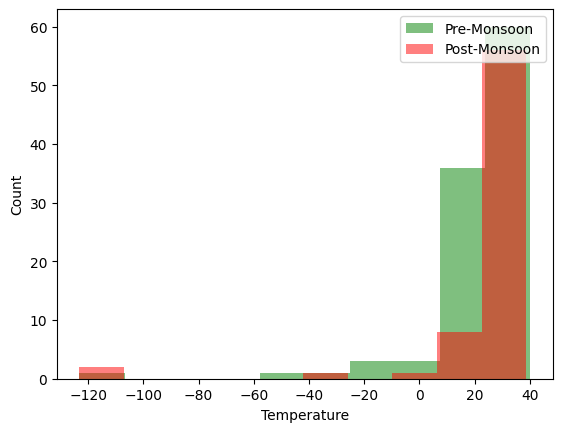

In [43]:
plt.hist(pre_monsoon_data['Temperature'], alpha=0.5, label='Pre-Monsoon', color='green')
plt.hist(post_monsoon_data['Temperature'], alpha=0.5, label='Post-Monsoon', color='red')
plt.legend(loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show("png")

## Boxplots for Outliers.

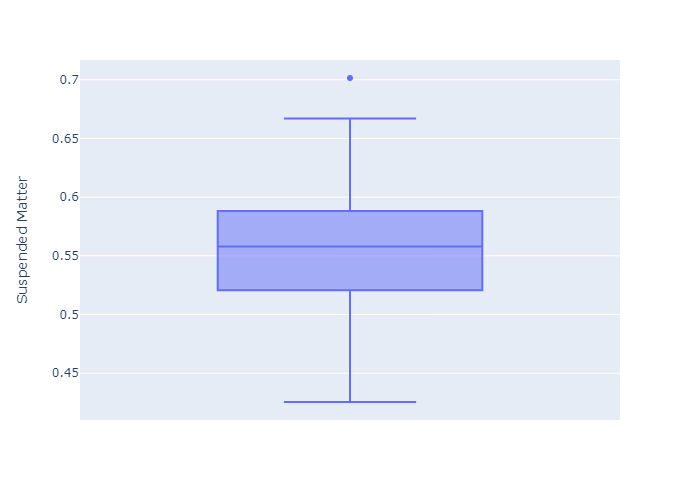

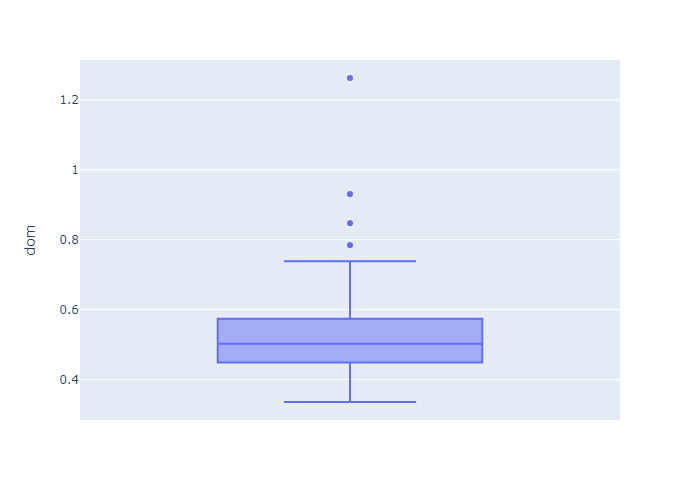

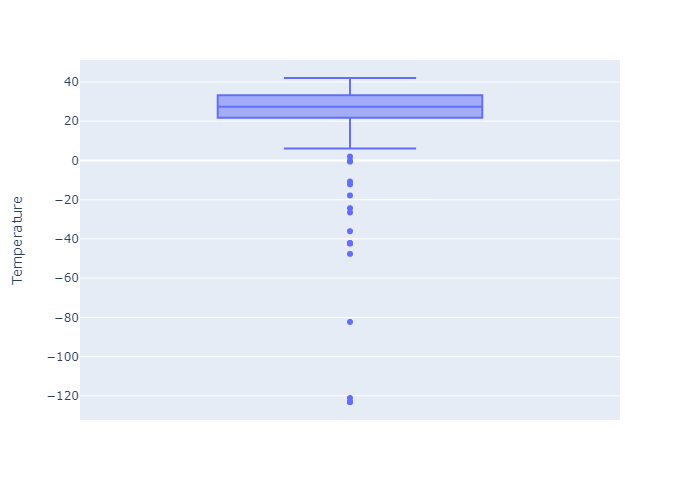

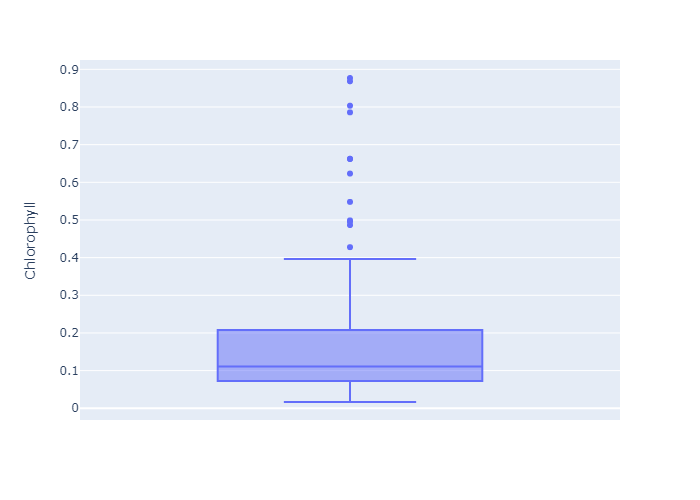

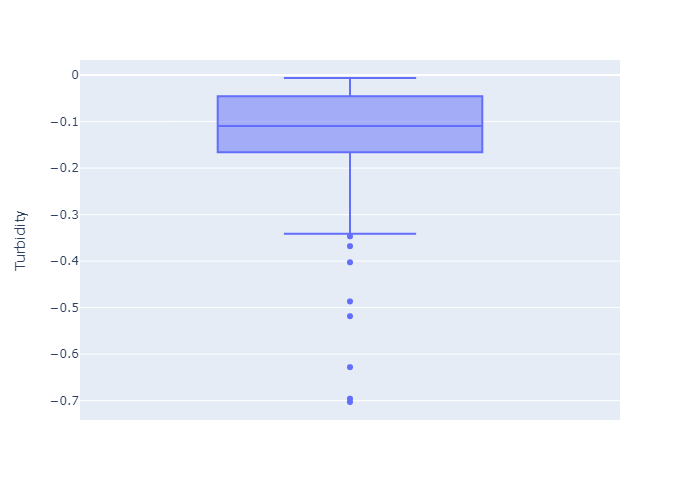

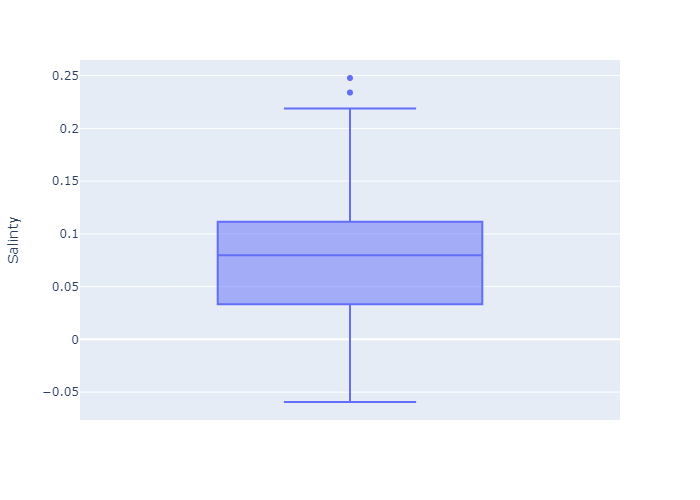

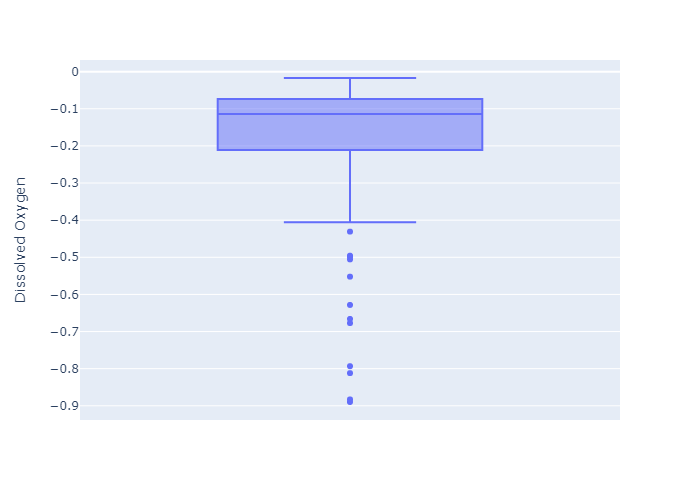

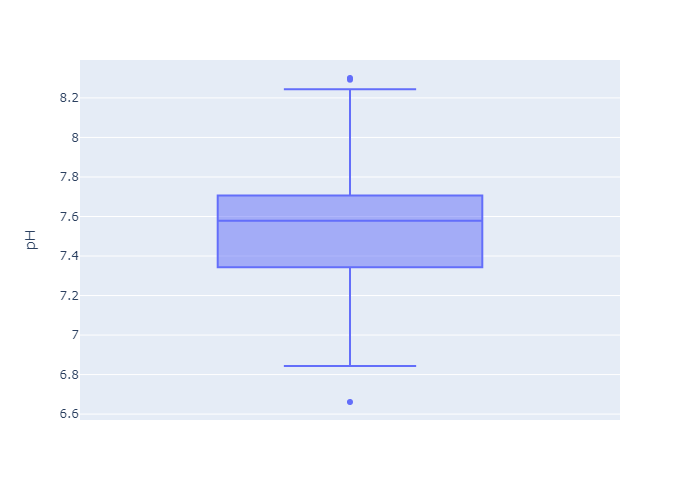

In [44]:
import plotly.express as px
import matplotlib.pyplot as plt
for i in df1.columns:
  fig = px.box(df, y=i)
  plt.figsize=(18,4)
  fig.show("png")

> 1. The outliers insights have been mentioned in the above graphs.
> 2. The one which have not been mentioned are outliers but still in the good zone so can be neglected.

# **Yearwise data plotting for outliers**

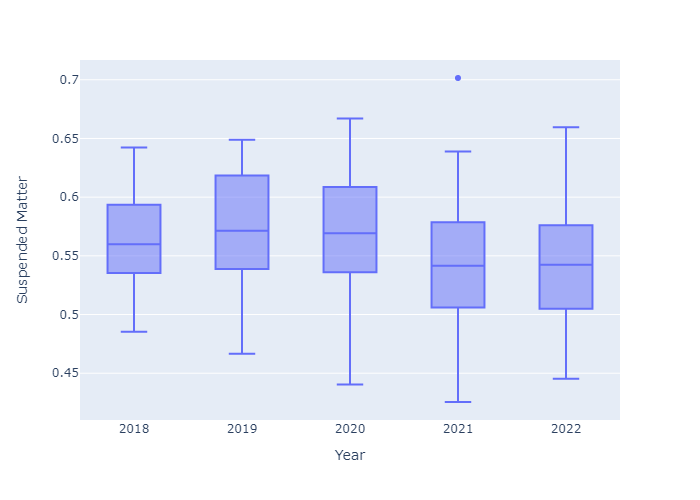

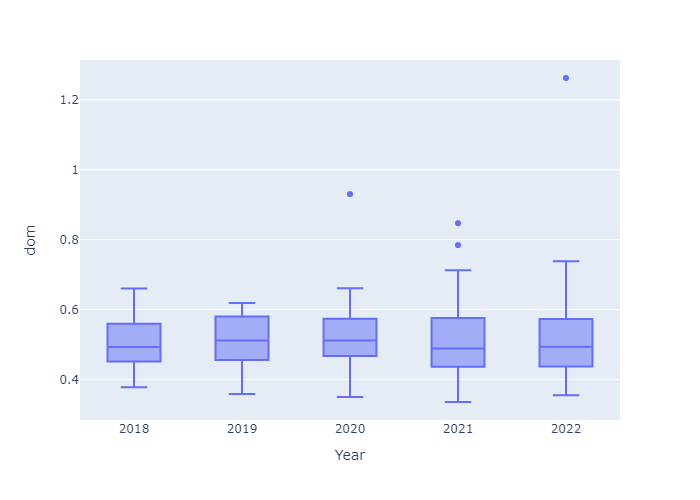

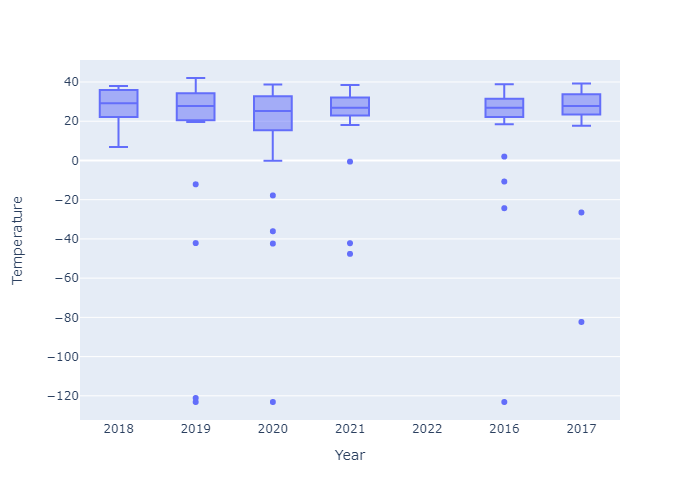

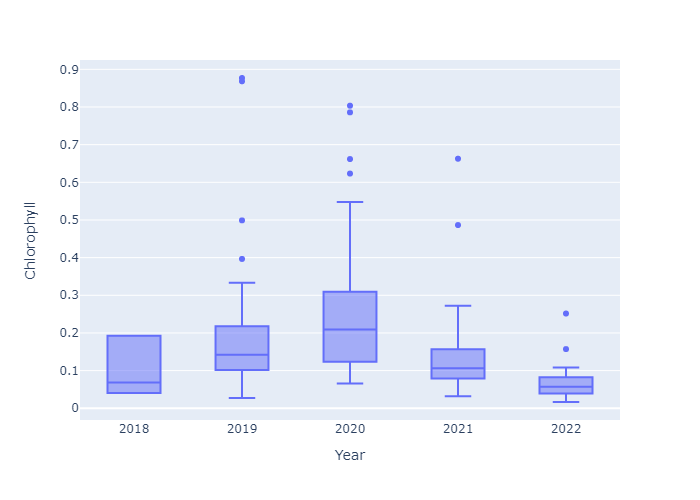

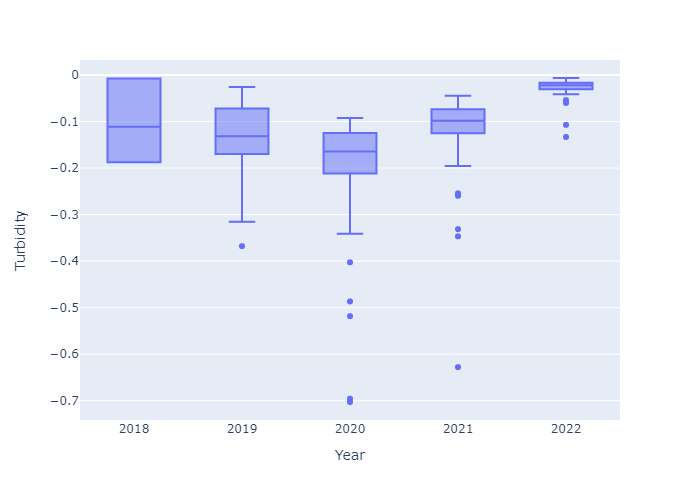

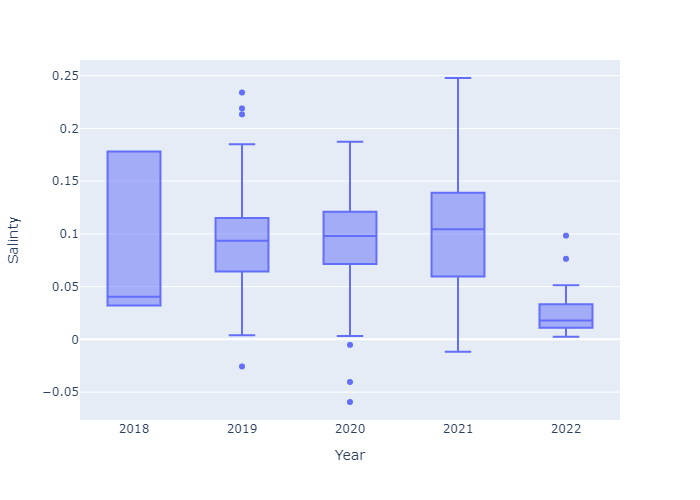

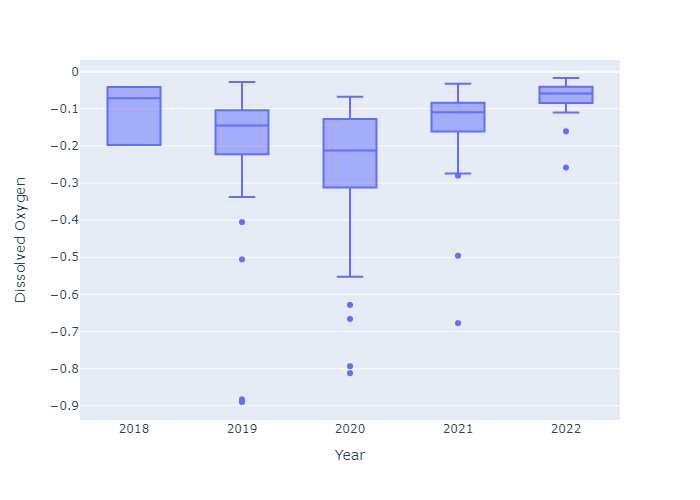

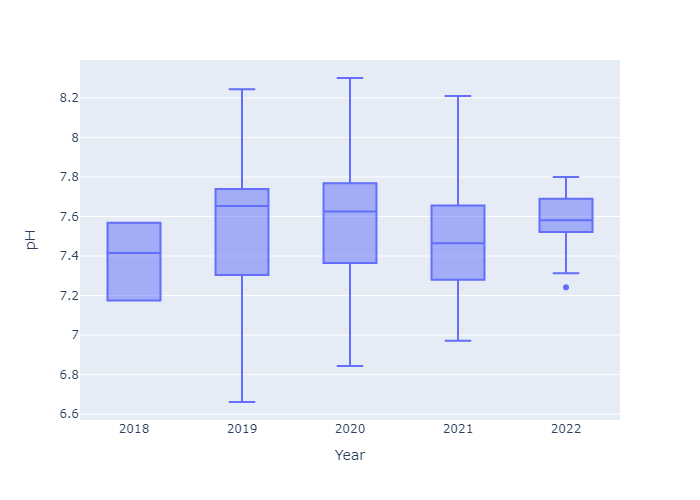

In [45]:
for i in df1.columns:
  fig = px.box(df, x="Year", y=i)
  fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
  fig.show("png")

**Outliers in pre-covid years:**

  1. **pH**
  
**Outliers in covid & post-covid years:**

  1. **Chlorophyll**
  2. **Dissolved Oxygen**

**Outliers only in post-covid years**
1. **Salinity**
2. **Turbidity**
3. **Dissolved Organic Matter**
**Temperature and pH has equal outliers in both types**

# **Individual Plotting**

## Correlations

<AxesSubplot: >

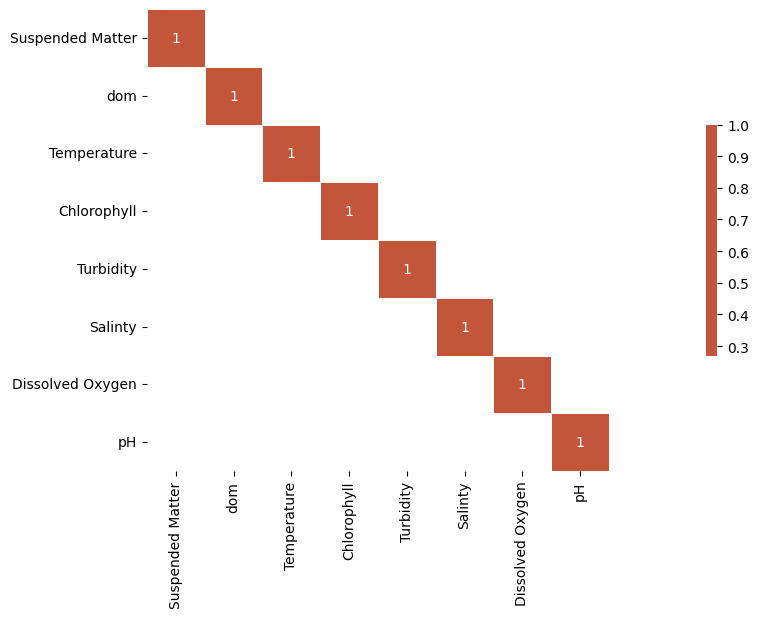

In [46]:
plt.figure(figsize=(25,6))
sns.heatmap(df1.corr(),annot=True,cmap=sns.diverging_palette(230, 20, as_cmap=True),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

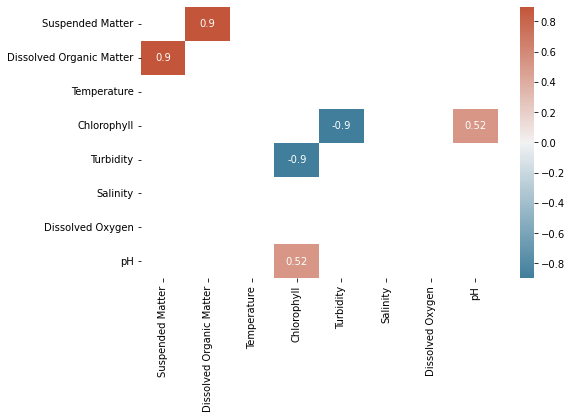

In [ ]:
dfCorr = df1.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

1. **Suspended Matter & Dissolved Organic Matter** have **strong positive correlation of 0.9.** This is correct as the dissolved organic matter increases the amount of Suspended matter.

3. **Chlorophyll & Turbidity** have **strong negative correlation of -0.9.** This correlation is exactly opposite of what it should be because normally, increase in chlorophyll increases the turbidity and we are able to see murky water.    

4. **pH & Chlorophyll** have **moderately positive correlation of 0.52.** This correlation is correct as the chlorophyll needs neutral to slightly acidic environment. So, increase in pH helps in increase in chlorophyll.

# Removing outliers & visualising data

In [47]:
df_new = df[(df['Temperature'] > 0) | (np.isnan(df['Temperature']))]
df_new = df_new[((df_new['Dissolved Oxygen'] <= 10) & (df_new['Dissolved Oxygen'] >= 2)) | (np.isnan(df_new['Dissolved Oxygen']))]
df_new

,Dissolved Oxygen,Salinty,Temperature,Chlorophyll,Turbidity,pH,Suspended Matter,dom,Year,Month,Day
Date,,,,,,,,,,,
2018-12-18,NaN,0.032208,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,18
2018-12-23,NaN,0.177992,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,23
2018-12-28,NaN,0.040495,NaN,NaN,NaN,NaN,NaN,NaN,2018,12,28
2019-02-01,NaN,0.093497,NaN,NaN,NaN,NaN,NaN,NaN,2019,02,01
2019-07-01,NaN,0.064393,NaN,NaN,NaN,NaN,NaN,NaN,2019,07,01
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.402251,2018,12,27
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462673,2018,12,27
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.442804,2018,12,28


In [48]:
df4=df_new.filter(['Suspended Matter', 'dom', 'Temperature','Chlorophyll', 'Turbidity', 'Salinty', 'Dissolved Oxygen', 'pH'])

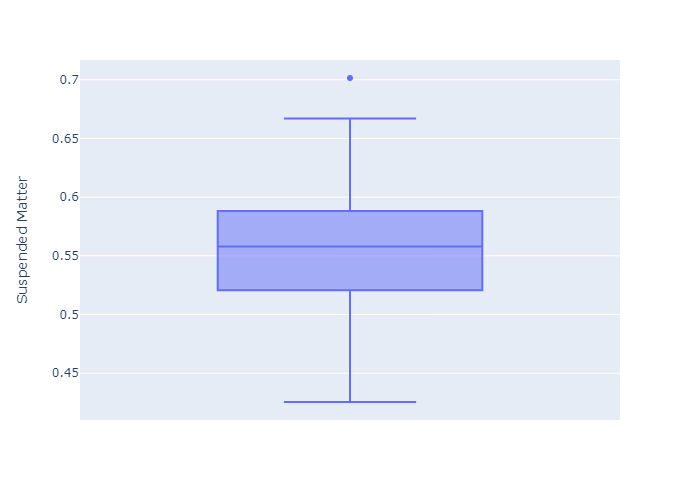

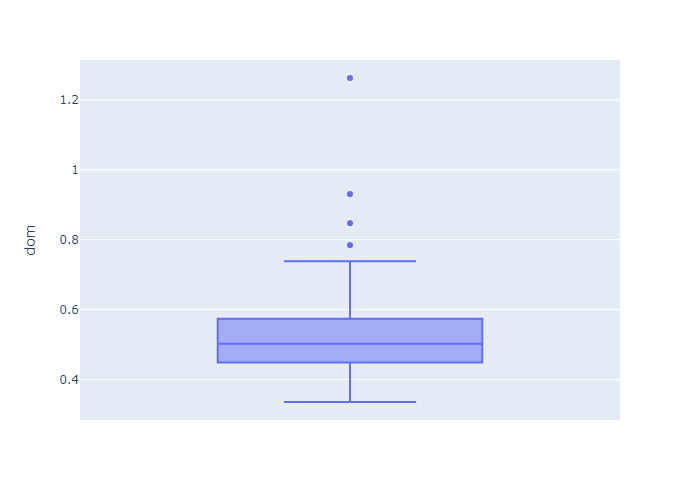

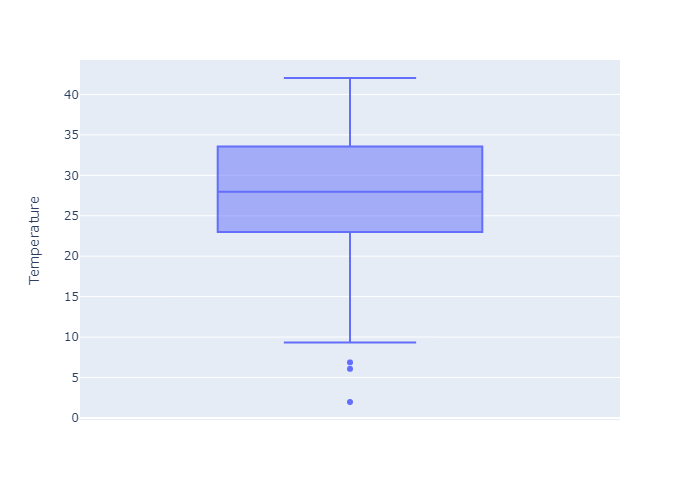

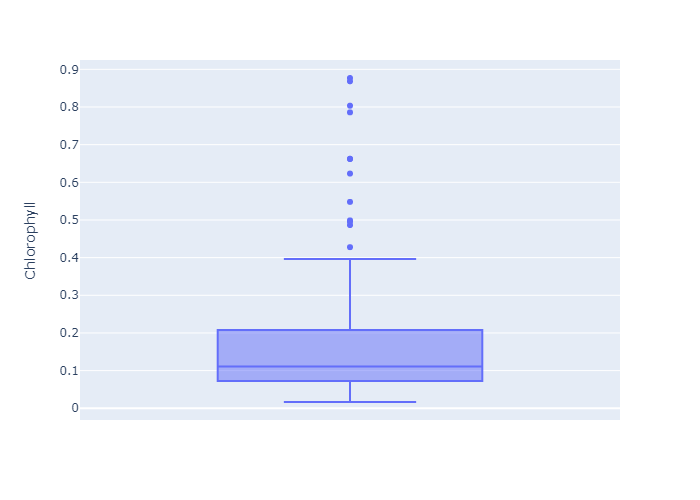

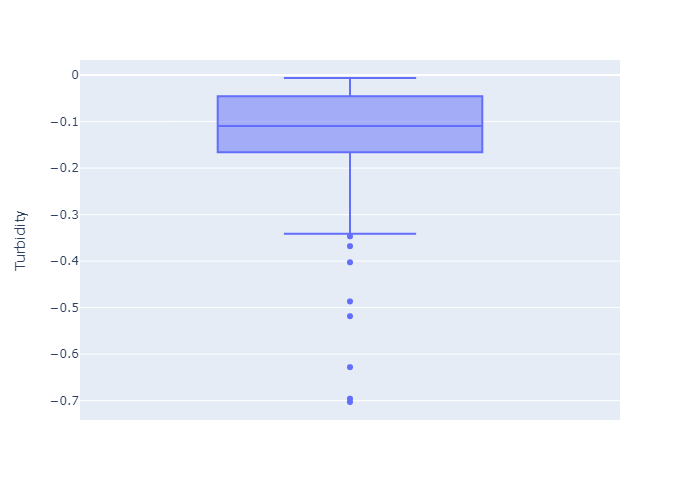

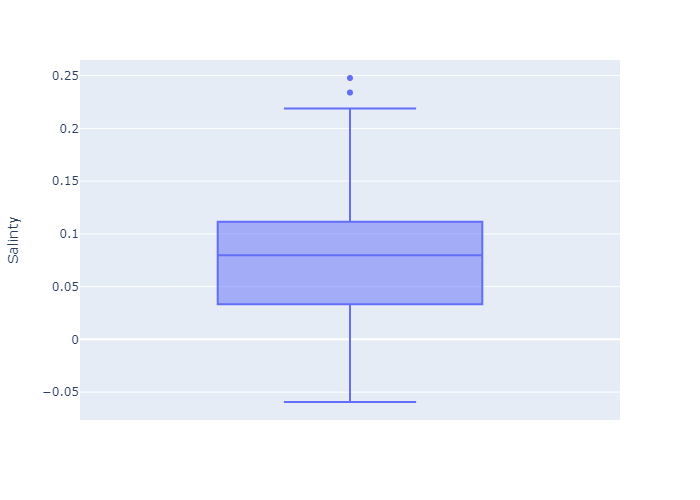

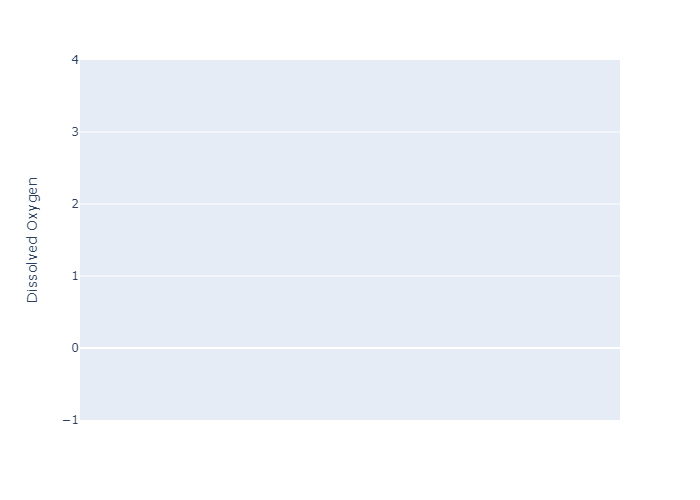

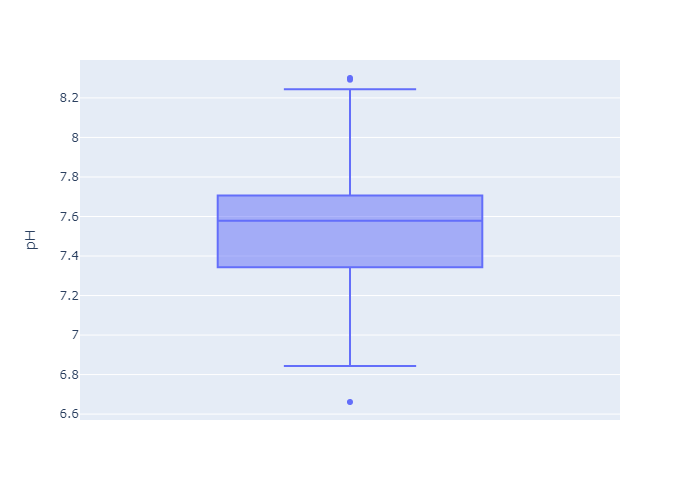

In [49]:
import plotly.express as px
import matplotlib.pyplot as plt
for i in df4.columns:
  fig = px.box(df_new, y=i)
  plt.figsize=(18,4)
  fig.show("png")

> We observe that upon removing outliers from temperature & dissolved oxygen, outliers for other parameters also got removed & a few are only left.

In [50]:
df5 = pd.DataFrame()
for i in df4.columns:
    r_mean_daily_max = df_new.groupby(['Year', 'Month','Day'], as_index=False)[i].max()
    mda8 = r_mean_daily_max.groupby(['Year', 'Month'], as_index=False)[i].median()
    df5[i]=r_mean_daily_max.groupby(['Year', 'Month'], as_index=True)[i].median()

## Correlations(daily data)

<AxesSubplot: >

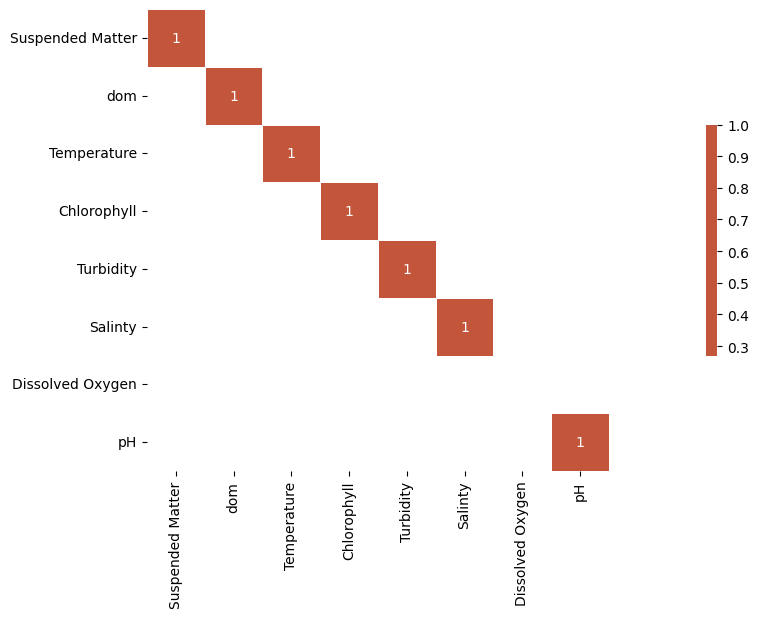

In [51]:
plt.figure(figsize=(25,6))
sns.heatmap(df4.corr(),annot=True,cmap=sns.diverging_palette(230, 20, as_cmap=True),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

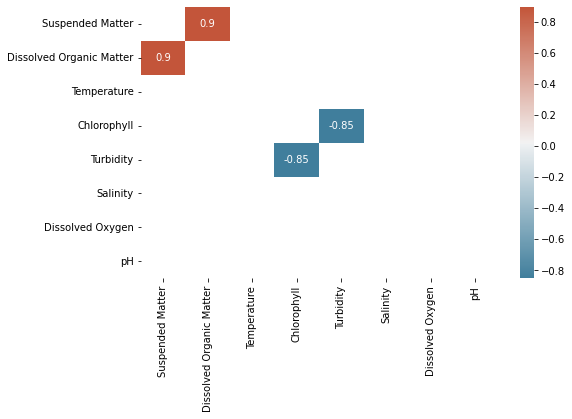

In [ ]:
dfCorr = df4.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

**1. Correlation between Chlorophyll and Turbidity increased from -0.9 to -0.85.**

**2. Correlation between pH and Chlorophyll have disappeared.**

In [52]:
df5=df5.reset_index()
df5['date'] = pd.to_datetime(df5[['Year', 'Month']].assign(DAY=1))
df5=df5.set_index("date")
df5.head()

,Year,Month,Suspended Matter,dom,Temperature,Chlorophyll,Turbidity,Salinty,Dissolved Oxygen,pH
date,,,,,,,,,,
2016-01-01,2016,01,NaN,NaN,22.202574,NaN,NaN,NaN,NaN,NaN
2016-02-01,2016,02,NaN,NaN,23.566596,NaN,NaN,NaN,NaN,NaN
2016-03-01,2016,03,NaN,NaN,29.994883,NaN,NaN,NaN,NaN,NaN
2016-04-01,2016,04,NaN,NaN,34.707658,NaN,NaN,NaN,NaN,NaN
2016-05-01,2016,05,NaN,NaN,33.512856,NaN,NaN,NaN,NaN,NaN


## Correlations(monthly data)

C:\Users\astha\AppData\Local\Temp\ipykernel_8640\1019312415.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

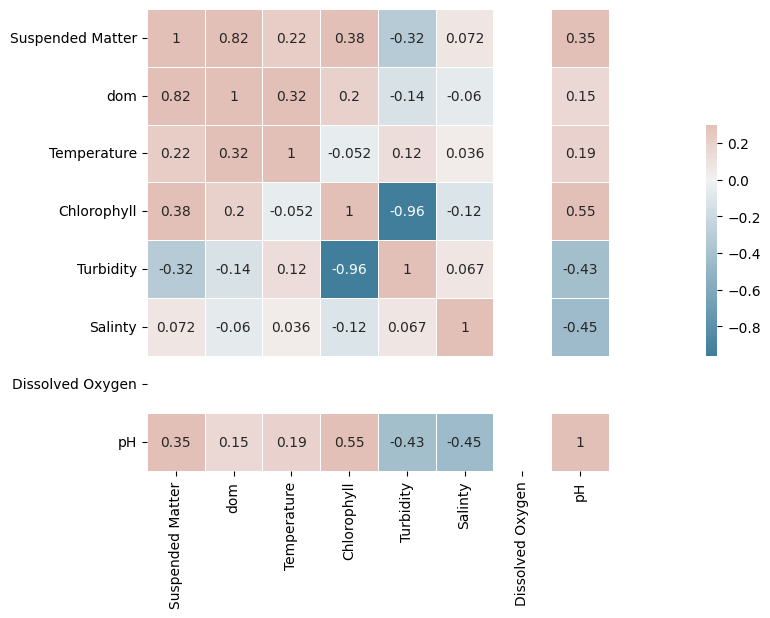

In [53]:
plt.figure(figsize=(25,6))
sns.heatmap(df5.corr(),annot=True,cmap=sns.diverging_palette(230, 20, as_cmap=True),vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

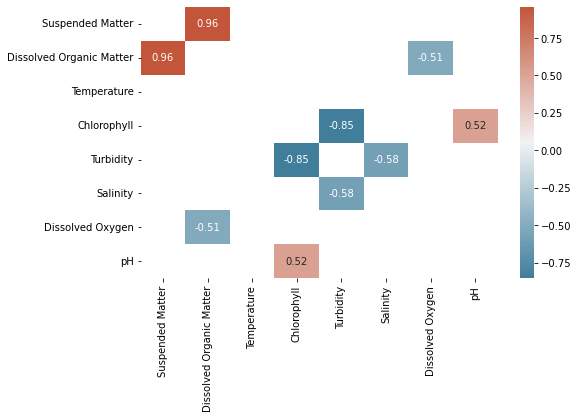

In [ ]:
dfCorr = df5.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,5))
sns.heatmap(filteredDf, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.show()

**1. Correlation between Suspended Matter and Dissolved Organic Matter have increased from 0.9 to 0.96.**

**2. The positive correlation of 0.52 between Chlorophyll and pH has returned.**

**3. A new negative correlation of -0.58 has been added between Turbidity and Salinity.** This is correct because increase in salinity results in decrease in turbidity.

**4. A new negative correlation of -0.51 has been added between Dissolved Oxygen and Dissolved Organic Matter.** This makes sense because Dissolved organic matter is decomposed by microorganisms using dissolved oxygen. More oxygen will be required to break down dissolved organic matter if it increases in quantity and hence will reduce the amount of dissolved oxygen in water.